# **1. Data Collection**

**1.1 Importing File Formats**

In [4]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('/content/lung cancer survey.csv')

**1.21 Checking Data Types**

In [5]:
data_types = df.dtypes
print(data_types)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


**1.22 Checking Duplicates**

In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 33


# **2. Data Exploration**

**2.1 Understanding the Structure**

**2.11 View the First Few Rows**

In [7]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


**2.13 Summary Statistics**

In [8]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**2.14 View Column Names**

In [9]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

**2.15 Shape of the Data**

In [10]:
print(df.shape)

(309, 16)


**2.2 Missing Values**

**2.21 Identifying Missing Values**

In [11]:
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


**2.22 Dropping Rows or Columns with Missing Values**

In [12]:
# Drop rows with any missing values
df_cleaned_rows = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

# **3. Data Cleaning**

**3.1 Identifying Outliers using Z-Score**

In [13]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f"Number of outlier rows: {df_outliers.shape[0]}")

Number of outlier rows: 2


**3.2 Remove Outliers**

In [14]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# **4- Lung Cancer data detailed Analysis**

**What is the Distribution of Ages in the Dataset?**

In [15]:
import plotly.express as px

# Histogram of Age distribution
fig = px.histogram(df, x='AGE', nbins=20, title='Distribution of Ages')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

**How Does Smoking Status Correlate with Lung Cancer?**

In [16]:
import plotly.express as px

# Count plot of Smoking status vs Lung Cancer
fig = px.histogram(df, x='SMOKING', color='LUNG_CANCER', barmode='group', title='Smoking Status vs Lung Cancer')
fig.update_layout(xaxis_title='Smoking Status', yaxis_title='Count')
fig.show()

**What is the Gender Distribution in the Dataset?**

In [17]:
import plotly.express as px

# Pie chart of Gender distribution
fig = px.pie(df, names='GENDER', title='Gender Distribution')
fig.update_layout(legend_title_text='Gender')
fig.show()

**What is the Relationship Between Age and Lung Cancer?**

In [18]:
import plotly.express as px

# Scatter plot of Age vs Lung Cancer
fig = px.scatter(df, x='AGE', y='LUNG_CANCER', color='LUNG_CANCER', title='Age vs Lung Cancer')
fig.update_layout(xaxis_title='Age', yaxis_title='Lung Cancer')
fig.show()

**What is the Distribution of Lung Cancer by Gender?**

In [19]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Gender
fig = px.bar(df, x='GENDER', color='LUNG_CANCER', title='Lung Cancer Distribution by Gender',
             labels={'GENDER': 'Gender', 'count': 'Count'})
fig.update_layout(xaxis_title='Gender', yaxis_title='Count')
fig.show()

**What is the Distribution of Lung Cancer by Smoking Status?**

In [20]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Smoking Status
fig = px.bar(df, x='SMOKING', color='LUNG_CANCER', title='Lung Cancer Distribution by Smoking Status',
             labels={'SMOKING': 'Smoking Status', 'count': 'Count'})
fig.update_layout(xaxis_title='Smoking Status', yaxis_title='Count')
fig.show()

**What is the Distribution of Lung Cancer by Anxiety Level?**

In [21]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Anxiety
fig = px.bar(df, x='ANXIETY', color='LUNG_CANCER', title='Lung Cancer Distribution by Anxiety Level',
             labels={'ANXIETY': 'Anxiety Level', 'count': 'Count'})
fig.update_layout(xaxis_title='Anxiety Level', yaxis_title='Count')
fig.show()

**How Does the Presence of Chronic Disease Affect Lung Cancer Distribution?**

In [22]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Chronic Disease
fig = px.bar(df, x='CHRONIC DISEASE', color='LUNG_CANCER', title='Lung Cancer Distribution by Chronic Disease',
             labels={'CHRONIC DISEASE': 'Chronic Disease', 'count': 'Count'})
fig.update_layout(xaxis_title='Chronic Disease', yaxis_title='Count')
fig.show()

**What is the Distribution of Lung Cancer by Wheezing?**

In [23]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Wheezing
fig = px.bar(df, x='WHEEZING', color='LUNG_CANCER', title='Lung Cancer Distribution by Wheezing',
             labels={'WHEEZING': 'Wheezing', 'count': 'Count'})
fig.update_layout(xaxis_title='Wheezing', yaxis_title='Count')
fig.show()

**How Does Alcohol Consumption Relate to Lung Cancer?**

In [24]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Alcohol Consumption
fig = px.bar(df, x='ALCOHOL CONSUMING', color='LUNG_CANCER', title='Lung Cancer Distribution by Alcohol Consumption',
             labels={'ALCOHOL CONSUMING': 'Alcohol Consumption', 'count': 'Count'})
fig.update_layout(xaxis_title='Alcohol Consumption', yaxis_title='Count')
fig.show()

**What is the Distribution of Lung Cancer by Coughing?**

In [25]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Coughing
fig = px.bar(df, x='COUGHING', color='LUNG_CANCER', title='Lung Cancer Distribution by Coughing',
             labels={'COUGHING': 'Coughing', 'count': 'Count'})
fig.update_layout(xaxis_title='Coughing', yaxis_title='Count')
fig.show()

**What is the Distribution of Lung Cancer by Shortness of Breath?**

In [26]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Shortness of Breath
fig = px.bar(df, x='SHORTNESS OF BREATH', color='LUNG_CANCER', title='Lung Cancer Distribution by Shortness of Breath',
             labels={'SHORTNESS OF BREATH': 'Shortness of Breath', 'count': 'Count'})
fig.update_layout(xaxis_title='Shortness of Breath', yaxis_title='Count')
fig.show()

**What is the Distribution of Lung Cancer by Swallowing Difficulty?**

In [27]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Swallowing Difficulty
fig = px.bar(df, x='SWALLOWING DIFFICULTY', color='LUNG_CANCER', title='Lung Cancer Distribution by Swallowing Difficulty',
             labels={'SWALLOWING DIFFICULTY': 'Swallowing Difficulty', 'count': 'Count'})
fig.update_layout(xaxis_title='Swallowing Difficulty', yaxis_title='Count')
fig.show()

**What is the Distribution of Lung Cancer by Chest Pain?**

In [28]:
import plotly.express as px

# Bar plot of Lung Cancer distribution by Chest Pain
fig = px.bar(df, x='CHEST PAIN', color='LUNG_CANCER', title='Lung Cancer Distribution by Chest Pain',
             labels={'CHEST PAIN': 'Chest Pain', 'count': 'Count'})
fig.update_layout(xaxis_title='Chest Pain', yaxis_title='Count')
fig.show()

**What is the Distribution of Ages in the Dataset?**

In [29]:
import plotly.express as px

# Histogram of Age distribution
fig = px.histogram(df, x='AGE', nbins=20, color='LUNG_CANCER', title='Age Distribution by Lung Cancer Status',
                   labels={'AGE': 'Age', 'count': 'Count'})
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

**What is the Distribution of Smoking Status in the Dataset?**

In [30]:
import plotly.express as px

# Histogram of Smoking status distribution
fig = px.histogram(df, x='SMOKING', color='LUNG_CANCER', title='Smoking Status Distribution by Lung Cancer Status',
                   labels={'SMOKING': 'Smoking Status', 'count': 'Count'})
fig.update_layout(xaxis_title='Smoking Status', yaxis_title='Count')
fig.show()

**What is the Distribution of Yellow Fingers in the Dataset?**

In [31]:
import plotly.express as px

# Histogram of Yellow Fingers distribution
fig = px.histogram(df, x='YELLOW_FINGERS', color='LUNG_CANCER', title='Yellow Fingers Distribution by Lung Cancer Status',
                   labels={'YELLOW_FINGERS': 'Yellow Fingers', 'count': 'Count'})
fig.update_layout(xaxis_title='Yellow Fingers', yaxis_title='Count')
fig.show()

**What is the Distribution of Anxiety Levels in the Dataset?**

In [32]:
import plotly.express as px

# Histogram of Anxiety distribution
fig = px.histogram(df, x='ANXIETY', color='LUNG_CANCER', title='Anxiety Distribution by Lung Cancer Status',
                   labels={'ANXIETY': 'Anxiety Level', 'count': 'Count'})
fig.update_layout(xaxis_title='Anxiety Level', yaxis_title='Count')
fig.show()

**What is the Distribution of Peer Pressure in the Dataset?**

In [33]:
import plotly.express as px

# Histogram of Peer Pressure distribution
fig = px.histogram(df, x='PEER_PRESSURE', color='LUNG_CANCER', title='Peer Pressure Distribution by Lung Cancer Status',
                   labels={'PEER_PRESSURE': 'Peer Pressure', 'count': 'Count'})
fig.update_layout(xaxis_title='Peer Pressure', yaxis_title='Count')
fig.show()

**What is the Distribution of Chronic Disease in the Dataset?**

In [34]:
import plotly.express as px

# Histogram of Chronic Disease distribution
fig = px.histogram(df, x='CHRONIC DISEASE', color='LUNG_CANCER', title='Chronic Disease Distribution by Lung Cancer Status',
                   labels={'CHRONIC DISEASE': 'Chronic Disease', 'count': 'Count'})
fig.update_layout(xaxis_title='Chronic Disease', yaxis_title='Count')
fig.show()

**What is the Distribution of Wheezing in the Dataset?**

In [35]:
import plotly.express as px

# Histogram of Wheezing distribution
fig = px.histogram(df, x='WHEEZING', color='LUNG_CANCER', title='Wheezing Distribution by Lung Cancer Status',
                   labels={'WHEEZING': 'Wheezing', 'count': 'Count'})
fig.update_layout(xaxis_title='Wheezing', yaxis_title='Count')
fig.show()

**What is the Distribution of Alcohol Consumption in the Dataset?**

In [36]:
import plotly.express as px

# Histogram of Alcohol Consumption distribution
fig = px.histogram(df, x='ALCOHOL CONSUMING', color='LUNG_CANCER', title='Alcohol Consumption Distribution by Lung Cancer Status',
                   labels={'ALCOHOL CONSUMING': 'Alcohol Consumption', 'count': 'Count'})
fig.update_layout(xaxis_title='Alcohol Consumption', yaxis_title='Count')
fig.show()

**What is the Distribution of Coughing in the Dataset?**

In [37]:
import plotly.express as px

# Histogram of Coughing distribution
fig = px.histogram(df, x='COUGHING', color='LUNG_CANCER', title='Coughing Distribution by Lung Cancer Status',
                   labels={'COUGHING': 'Coughing', 'count': 'Count'})
fig.update_layout(xaxis_title='Coughing', yaxis_title='Count')
fig.show()

**What is the Distribution of Shortness of Breath in the Dataset?**

In [38]:
import plotly.express as px

# Histogram of Shortness of Breath distribution
fig = px.histogram(df, x='SHORTNESS OF BREATH', color='LUNG_CANCER', title='Shortness of Breath Distribution by Lung Cancer Status',
                   labels={'SHORTNESS OF BREATH': 'Shortness of Breath', 'count': 'Count'})
fig.update_layout(xaxis_title='Shortness of Breath', yaxis_title='Count')
fig.show()

**What is the Distribution of Swallowing Difficulty in the Dataset?**

In [39]:
import plotly.express as px

# Histogram of Swallowing Difficulty distribution
fig = px.histogram(df, x='SWALLOWING DIFFICULTY', color='LUNG_CANCER', title='Swallowing Difficulty Distribution by Lung Cancer Status',
                   labels={'SWALLOWING DIFFICULTY': 'Swallowing Difficulty', 'count': 'Count'})
fig.update_layout(xaxis_title='Swallowing Difficulty', yaxis_title='Count')
fig.show()

**What is the Distribution of Chest Pain in the Dataset?**

In [40]:
import plotly.express as px

# Histogram of Chest Pain distribution
fig = px.histogram(df, x='CHEST PAIN', color='LUNG_CANCER', title='Chest Pain Distribution by Lung Cancer Status',
                   labels={'CHEST PAIN': 'Chest Pain', 'count': 'Count'})
fig.update_layout(xaxis_title='Chest Pain', yaxis_title='Count')
fig.show()

**What is the Relationship Between Age and Smoking Status?**

In [41]:
import plotly.express as px

# Scatterplot of Age vs Smoking Status
fig = px.scatter(df, x='AGE', y='SMOKING', color='LUNG_CANCER',
                 title='Relationship Between Age and Smoking Status by Lung Cancer Status',
                 labels={'AGE': 'Age', 'SMOKING': 'Smoking Status'})
fig.update_layout(xaxis_title='Age', yaxis_title='Smoking Status')
fig.show()

**What is the Correlation Between Smoking Status and Yellow Fingers?**

In [42]:
import plotly.express as px

# Scatterplot of Smoking Status vs Yellow Fingers
fig = px.scatter(df, x='SMOKING', y='YELLOW_FINGERS', color='LUNG_CANCER',
                 title='Relationship Between Smoking Status and Yellow Fingers by Lung Cancer Status',
                 labels={'SMOKING': 'Smoking Status', 'YELLOW_FINGERS': 'Yellow Fingers'})
fig.update_layout(xaxis_title='Smoking Status', yaxis_title='Yellow Fingers')
fig.show()

**How Does Anxiety Relate to Shortness of Breath?**

In [43]:
import plotly.express as px

# Scatterplot of Anxiety vs Shortness of Breath
fig = px.scatter(df, x='ANXIETY', y='SHORTNESS OF BREATH', color='LUNG_CANCER',
                 title='Relationship Between Anxiety and Shortness of Breath by Lung Cancer Status',
                 labels={'ANXIETY': 'Anxiety', 'SHORTNESS OF BREATH': 'Shortness of Breath'})
fig.update_layout(xaxis_title='Anxiety', yaxis_title='Shortness of Breath')
fig.show()

**What is the Relationship Between Chronic Disease and Coughing?**

In [44]:
import plotly.express as px

# Scatterplot of Chronic Disease vs Coughing
fig = px.scatter(df, x='CHRONIC DISEASE', y='COUGHING', color='LUNG_CANCER',
                 title='Relationship Between Chronic Disease and Coughing by Lung Cancer Status',
                 labels={'CHRONIC DISEASE': 'Chronic Disease', 'COUGHING': 'Coughing'})
fig.update_layout(xaxis_title='Chronic Disease', yaxis_title='Coughing')
fig.show()

**How Does Alcohol Consumption Relate to Wheezing?**

In [45]:
import plotly.express as px

# Scatterplot of Alcohol Consumption vs Wheezing
fig = px.scatter(df, x='ALCOHOL CONSUMING', y='WHEEZING', color='LUNG_CANCER',
                 title='Relationship Between Alcohol Consumption and Wheezing by Lung Cancer Status',
                 labels={'ALCOHOL CONSUMING': 'Alcohol Consumption', 'WHEEZING': 'Wheezing'})
fig.update_layout(xaxis_title='Alcohol Consumption', yaxis_title='Wheezing')
fig.show()

**What is the Correlation Between Age and Swallowing Difficulty?**

In [46]:
import plotly.express as px

# Scatterplot of Age vs Swallowing Difficulty
fig = px.scatter(df, x='AGE', y='SWALLOWING DIFFICULTY', color='LUNG_CANCER',
                 title='Relationship Between Age and Swallowing Difficulty by Lung Cancer Status',
                 labels={'AGE': 'Age', 'SWALLOWING DIFFICULTY': 'Swallowing Difficulty'})
fig.update_layout(xaxis_title='Age', yaxis_title='Swallowing Difficulty')
fig.show()

**How Do Anxiety, Shortness of Breath, and Coughing Relate to Each Other?**

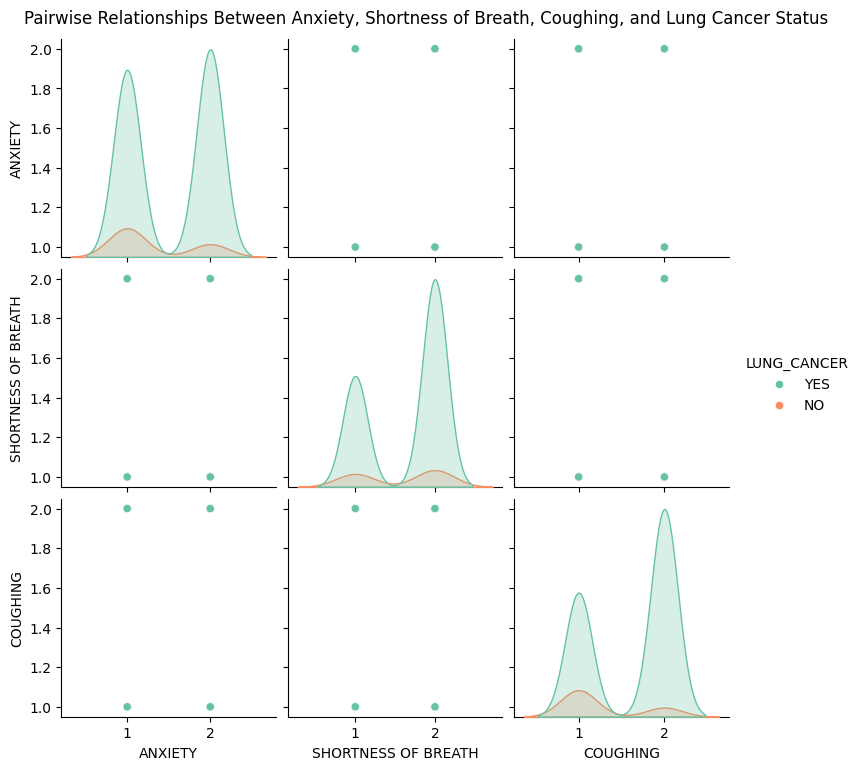

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Select relevant features for pairplot
features = ['ANXIETY', 'SHORTNESS OF BREATH', 'COUGHING', 'LUNG_CANCER']

# Create a pairplot
sns.pairplot(df[features], hue='LUNG_CANCER', palette='Set2')
plt.suptitle('Pairwise Relationships Between Anxiety, Shortness of Breath, Coughing, and Lung Cancer Status', y=1.02)
plt.show()


**What Are the Pairwise Relationships Between Yellow Fingers, Wheezing, and Chest Pain?**

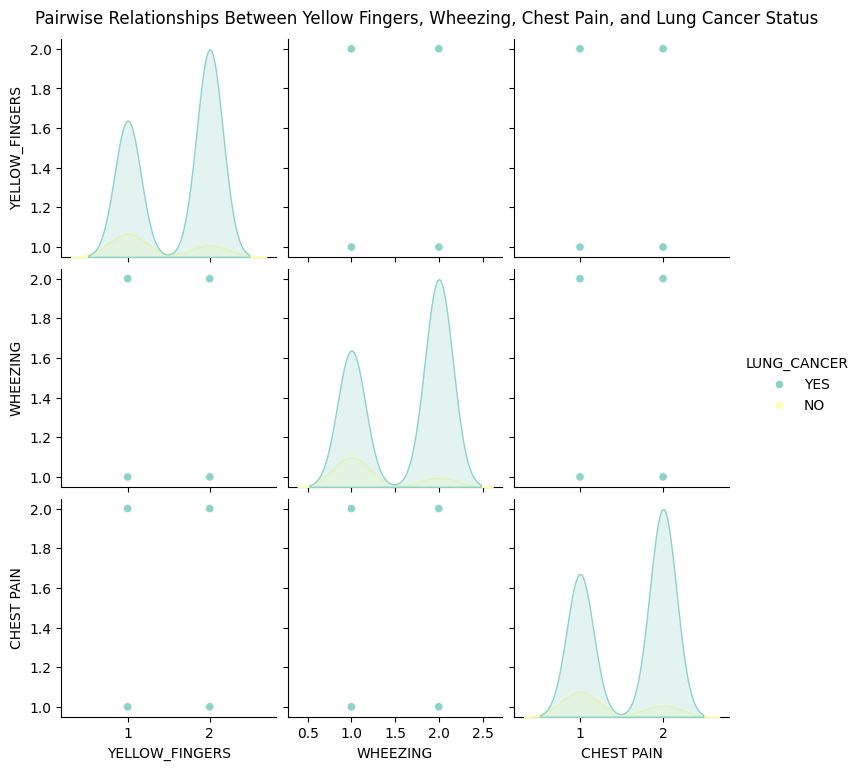

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for pairplot
features = ['YELLOW_FINGERS', 'WHEEZING', 'CHEST PAIN', 'LUNG_CANCER']

# Create a pairplot
sns.pairplot(df[features], hue='LUNG_CANCER', palette='Set3')
plt.suptitle('Pairwise Relationships Between Yellow Fingers, Wheezing, Chest Pain, and Lung Cancer Status', y=1.02)
plt.show()